In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

#loading dataset
dataset=load_dataset("lukebarousse/data_jobs")

df=dataset['train'].to_pandas()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'France'),
  Text(4, 0, 'Germany')])

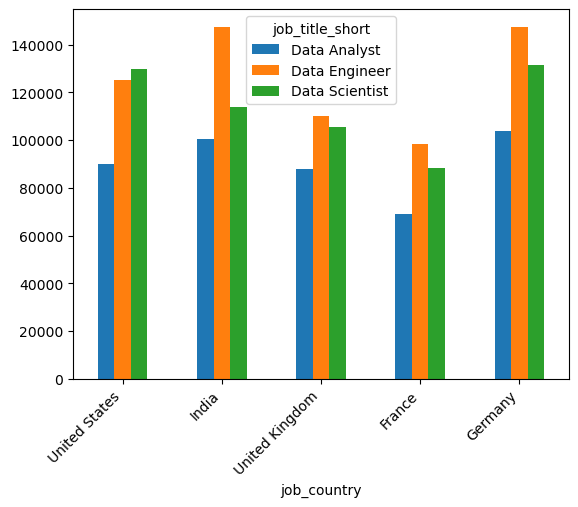

In [ ]:
df['job_posted_date']=pd.to_datetime(df.job_posted_date)

# pivot table

job_country_salary=df.pivot_table(
    index='job_country',
    values='salary_year_avg',
    columns='job_title_short',
    aggfunc='median')

top_countries=df.job_country.value_counts().head().index

job_country_salary=job_country_salary.loc[top_countries]

job_title=['Data Analyst','Data Engineer','Data Scientist']

job_country_salary=job_country_salary[job_title]

# plotting the bar chart

job_country_salary.plot(kind='bar')
plt.xticks(rotation=45, ha='right')

In [4]:
#   index management
#   df.sort_index

df.index
df.index.name='job index'
df_india=df[df.job_country=='India']

#   df.reset_index()

df_india.reset_index(inplace=True)
df_india.index.name='S.no.'
df_india

#   df.set_index()
#   df.sort_index()

median_india_pivot=df_india.pivot_table(index='job_title_short',values='salary_year_avg',aggfunc=['mean','median','max','min'])
median_india_pivot.reset_index()


,job_title_short,mean,median,max,min
,,salary_year_avg,salary_year_avg,salary_year_avg,salary_year_avg
0,Business Analyst,82255.125000,64800.0,142025.0,43200.0
1,Data Analyst,99149.925532,100500.0,650000.0,32400.0
2,Data Engineer,123312.390533,147500.0,249000.0,43200.0
3,Data Scientist,118203.690217,114008.0,204381.0,43200.0
4,Machine Learning Engineer,111372.570175,79200.0,267000.0,32500.0
5,Senior Data Analyst,105740.592593,111175.0,177283.0,64800.0
6,Senior Data Engineer,132148.631579,147500.0,181765.0,35000.0
7,Senior Data Scientist,126035.787879,149653.0,170575.0,64800.0
8,Software Engineer,78420.377778,79200.0,200000.0,44418.5


In [ ]:
median_india_pivot.sort_values(by=('median','salary_year_avg'))


,mean,median,max,min
,salary_year_avg,salary_year_avg,salary_year_avg,salary_year_avg
job_title_short,,,,
Business Analyst,82255.125000,64800.0,142025.0,43200.0
Machine Learning Engineer,111372.570175,79200.0,267000.0,32500.0
Software Engineer,78420.377778,79200.0,200000.0,44418.5
Data Analyst,99149.925532,100500.0,650000.0,32400.0
Senior Data Analyst,105740.592593,111175.0,177283.0,64800.0
Data Scientist,118203.690217,114008.0,204381.0,43200.0
Senior Data Engineer,132148.631579,147500.0,181765.0,35000.0
Data Engineer,123312.390533,147500.0,249000.0,43200.0


In [3]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
